# Trabajo Práctico II - Ejercicio 1
### Fernando Ezequiel pose

## Información del dataset y contexto

**Conjunto de datos de calidad del aire para clasificación ADL (*Activities of Daily Living*)**

`Gambi, Ennio (2020), “Air Quality dataset for ADL classification”, Mendeley Data, V1, doi: 10.17632/kn3x9rz3kd.1`

La variación en la concentración de gas interior a lo largo del tiempo se monitorea y los datos se almacenan para usar esta información para evaluar el tipo de actividad realizada en la habitación. Gracias al uso de inteligencia artificial, se evitó un enfoque cuantitativo para determinar la concentración de gas, que habría requerido una cuidadosa calibración de los sensores. El conjunto de datos contiene los valores adquiridos por una matriz de 6 sensores de bajo costo en instantes sucesivos de tiempo, y los valores almacenados están asociados con la acción particular que los generó. A través de un procesamiento de datos apropiado, basado en algoritmos de aprendizaje automático, después de una fase de capacitación inicial, es posible reconocer las acciones que se llevan a cabo dentro del hogar. La presencia de productos químicos en el aire se determina a través de una serie de sensores de gas electroquímicos que se han seleccionado en función de las especificaciones técnicas establecidas sobre la capacidad de detectar clases de compuestos. El conjunto de sensores se puede agrupar en dos categorías principales:
- Sensores MQ ( MQ2, MQ9, MQ135, MQ137, MQ138 ) que tienen gran sensibilidad, baja latencia y bajo costo; cada sensor puede responder a diferentes gases;
- Sensor analógico de gas CO2 ( MG-811 ) que tiene una excelente sensibilidad al dióxido de carbono y apenas se ve afectado por la temperatura y la humedad del aire.

El conjunto de datos contiene 1845 muestras recolectadas que describen 4 situaciones objetivo:

1. Situación normal - Actividad: aire limpio, una persona que duerme o estudia
o descansa - Muestras: 595.
2. Preparación de comidas - Actividades: cocinar carne o pasta, verduras fritas. Una o dos personas en la habitación, circulación de aire forzado - Muestras: 515.
3. Presencia de humo - Actividad: quemar papel y madera por un corto período de tiempo en una habitación con ventanas y puertas cerradas - Muestras: 195.
4. Limpieza - Actividad: uso de detergentes en aerosol y líquidos con amoníaco y / o alcohol. La circulación de aire forzado se puede activar o desactivar - Muestras: 540.

Cada muestra está compuesta por 7 valores; los primeros seis valores son las salidas del sensor, mientras que el último es el índice de la acción que generó los valores adquiridos por los sensores. Las cuatro situaciones diferentes están asociadas con una composición del aire bastante diferente, teniendo en cuenta que cualquier actividad produce sustancias químicas (respiración humana, exhalaciones de procesos metabólicos, liberación de volátiles por combustión y/o oxidación, evaporación de detergentes domésticos, etc.).

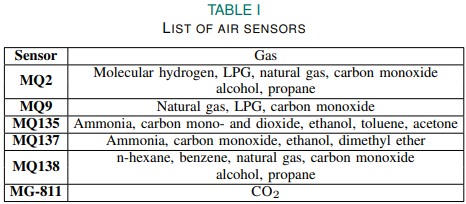

## Librerías Generales

In [ ]:
# Instalación de librerías que no tiene precargadas
!pip install lazypredict
!pip install shap

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# LazyPredict
from lazypredict.Supervised import LazyClassifier

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metricas de desempeño
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap

# Otras
import time

## Análisis Exploratorio de Datos

In [ ]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t" -O dataset_ADL_clasificacion.zip

# Unzip del archivo
!unzip dataset_ADL_clasificacion.zip

# Lectura del dataset
dataset = pd.read_csv("dataset_ADL_clasificacion.csv")

--2023-11-12 19:40:27--  https://drive.google.com/uc?export=download&id=1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV&confirm=t
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0r09kq7ukuibttgkkathc092bu0ai5t0/1699818000000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=e7f839b7-95ce-4a00-80cc-70f2bba5c60e [following]
--2023-11-12 19:40:28--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0r09kq7ukuibttgkkathc092bu0ai5t0/1699818000000/12225850433951268217/*/1VjETEiUgN5TyfAWbpZwTy7VNHkxwWSMV?e=download&uuid=e7f839b7-95ce-4a00-80cc-70f2bba5c60e
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 172.217.12.1, 2607:f8b0:

In [ ]:
# Elimino valores duplicados
vDuplicados = dataset.duplicated().sum()
if vDuplicados > 0:
    # Eliminar las filas duplicadas
    dataset.drop_duplicates(inplace=True)
    print(f'Se eliminaron {vDuplicados} filas duplicadas.')

Se eliminaron 14 filas duplicadas.


In [ ]:
dataset

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MQ2        1831 non-null   int64
 1   MQ9        1831 non-null   int64
 2   MQ135      1831 non-null   int64
 3   MQ137      1831 non-null   int64
 4   MQ138      1831 non-null   int64
 5   MG-811     1831 non-null   int64
 6   Situacion  1831 non-null   int64
dtypes: int64(7)
memory usage: 114.4 KB


In [ ]:
dataset.describe()

,MQ2,MQ9,MQ135,MQ137,MQ138,MG-811,Situacion
count,1831.00,1831.00,1831.00,1831.00,1831.00,1831.00,1831.00
mean,587.46,653.70,1166.34,1609.63,1302.43,2246.76,2.37
std,189.87,172.69,207.82,118.39,278.67,181.03,1.21
min,263.00,346.00,753.00,1323.00,773.00,1797.00,1.00
25%,431.50,518.00,995.00,1509.00,1087.00,2137.00,1.00
50%,551.00,623.00,1162.00,1611.00,1264.00,2265.00,2.00
75%,712.50,745.50,1308.00,1692.00,1552.50,2372.00,4.00
max,1266.00,1388.00,1738.00,1926.00,1948.00,2703.00,4.00


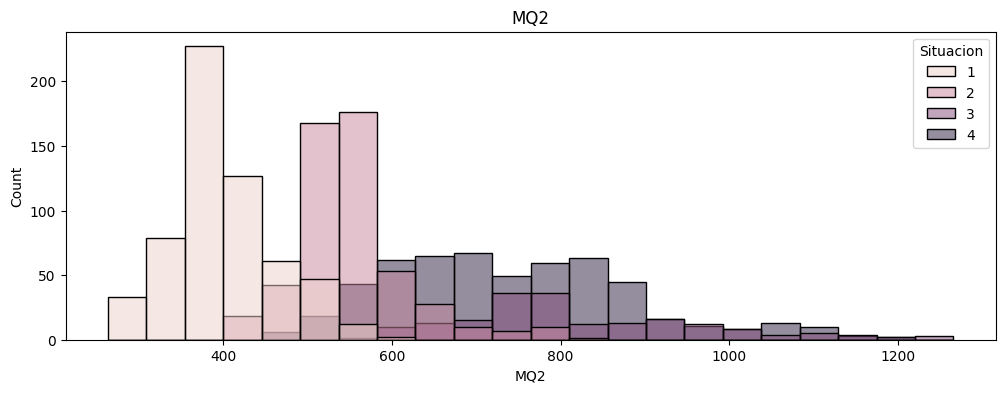

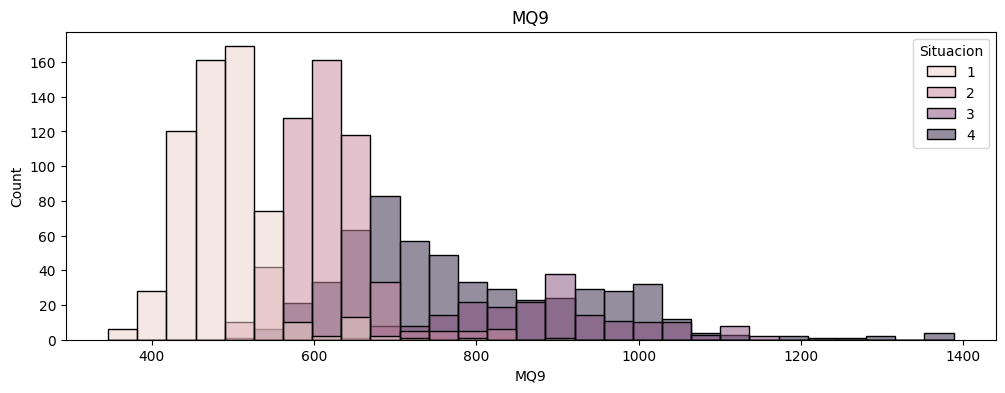

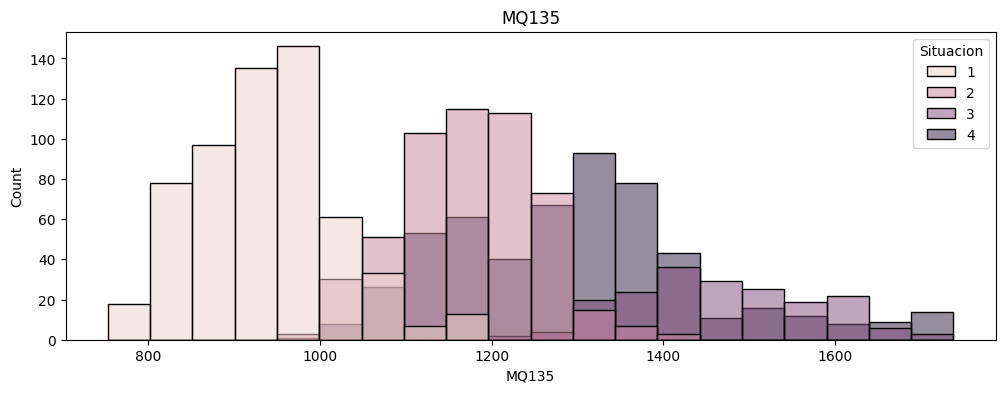

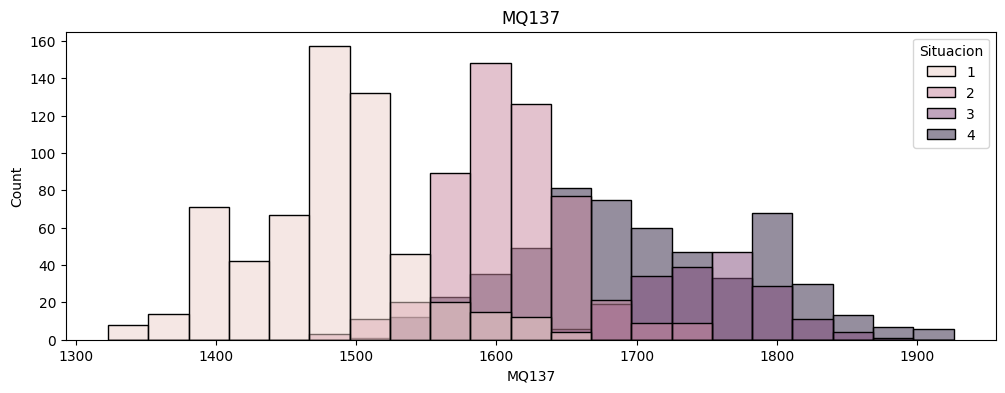

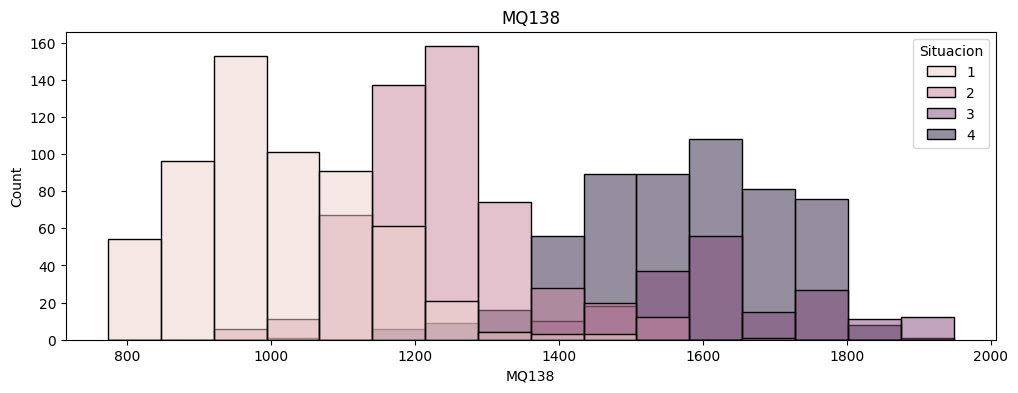

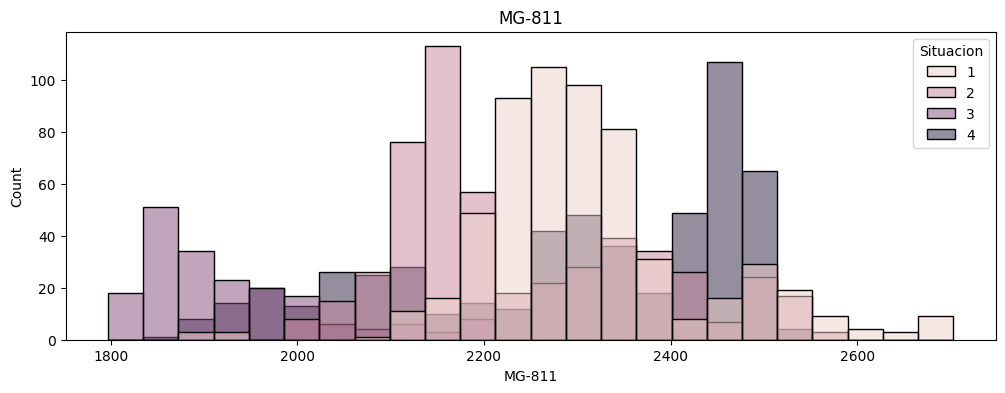

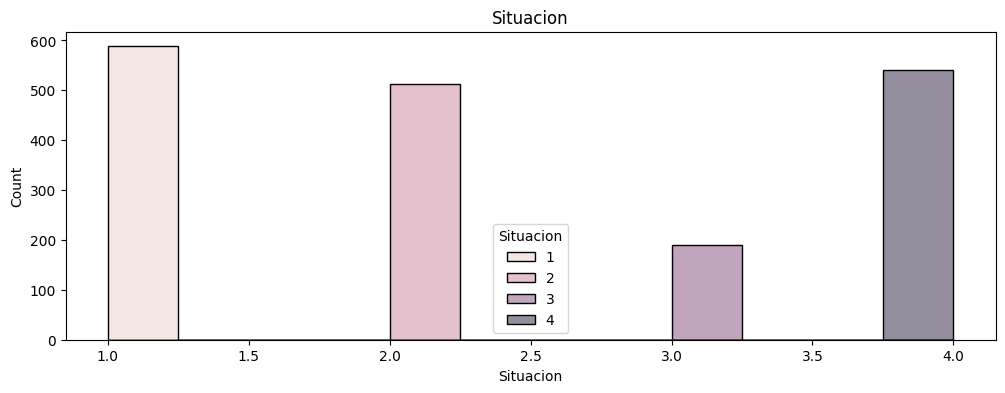

In [ ]:
for col in dataset.columns:
    plt.figure(figsize=(12, 4))
    plt.title(col)
    sns.histplot(data=dataset, x = col, hue='Situacion', )
    plt.show()

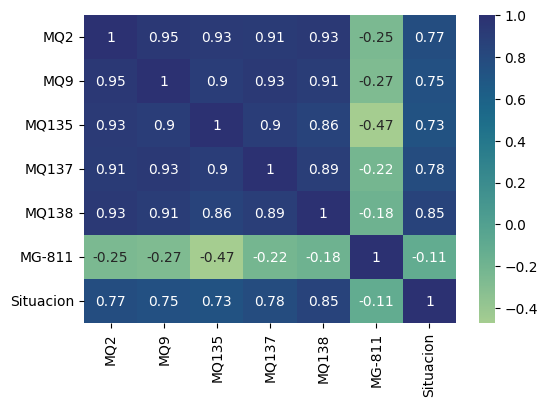

In [ ]:
sns.heatmap(data=dataset.corr(), annot=True, cmap="crest")
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

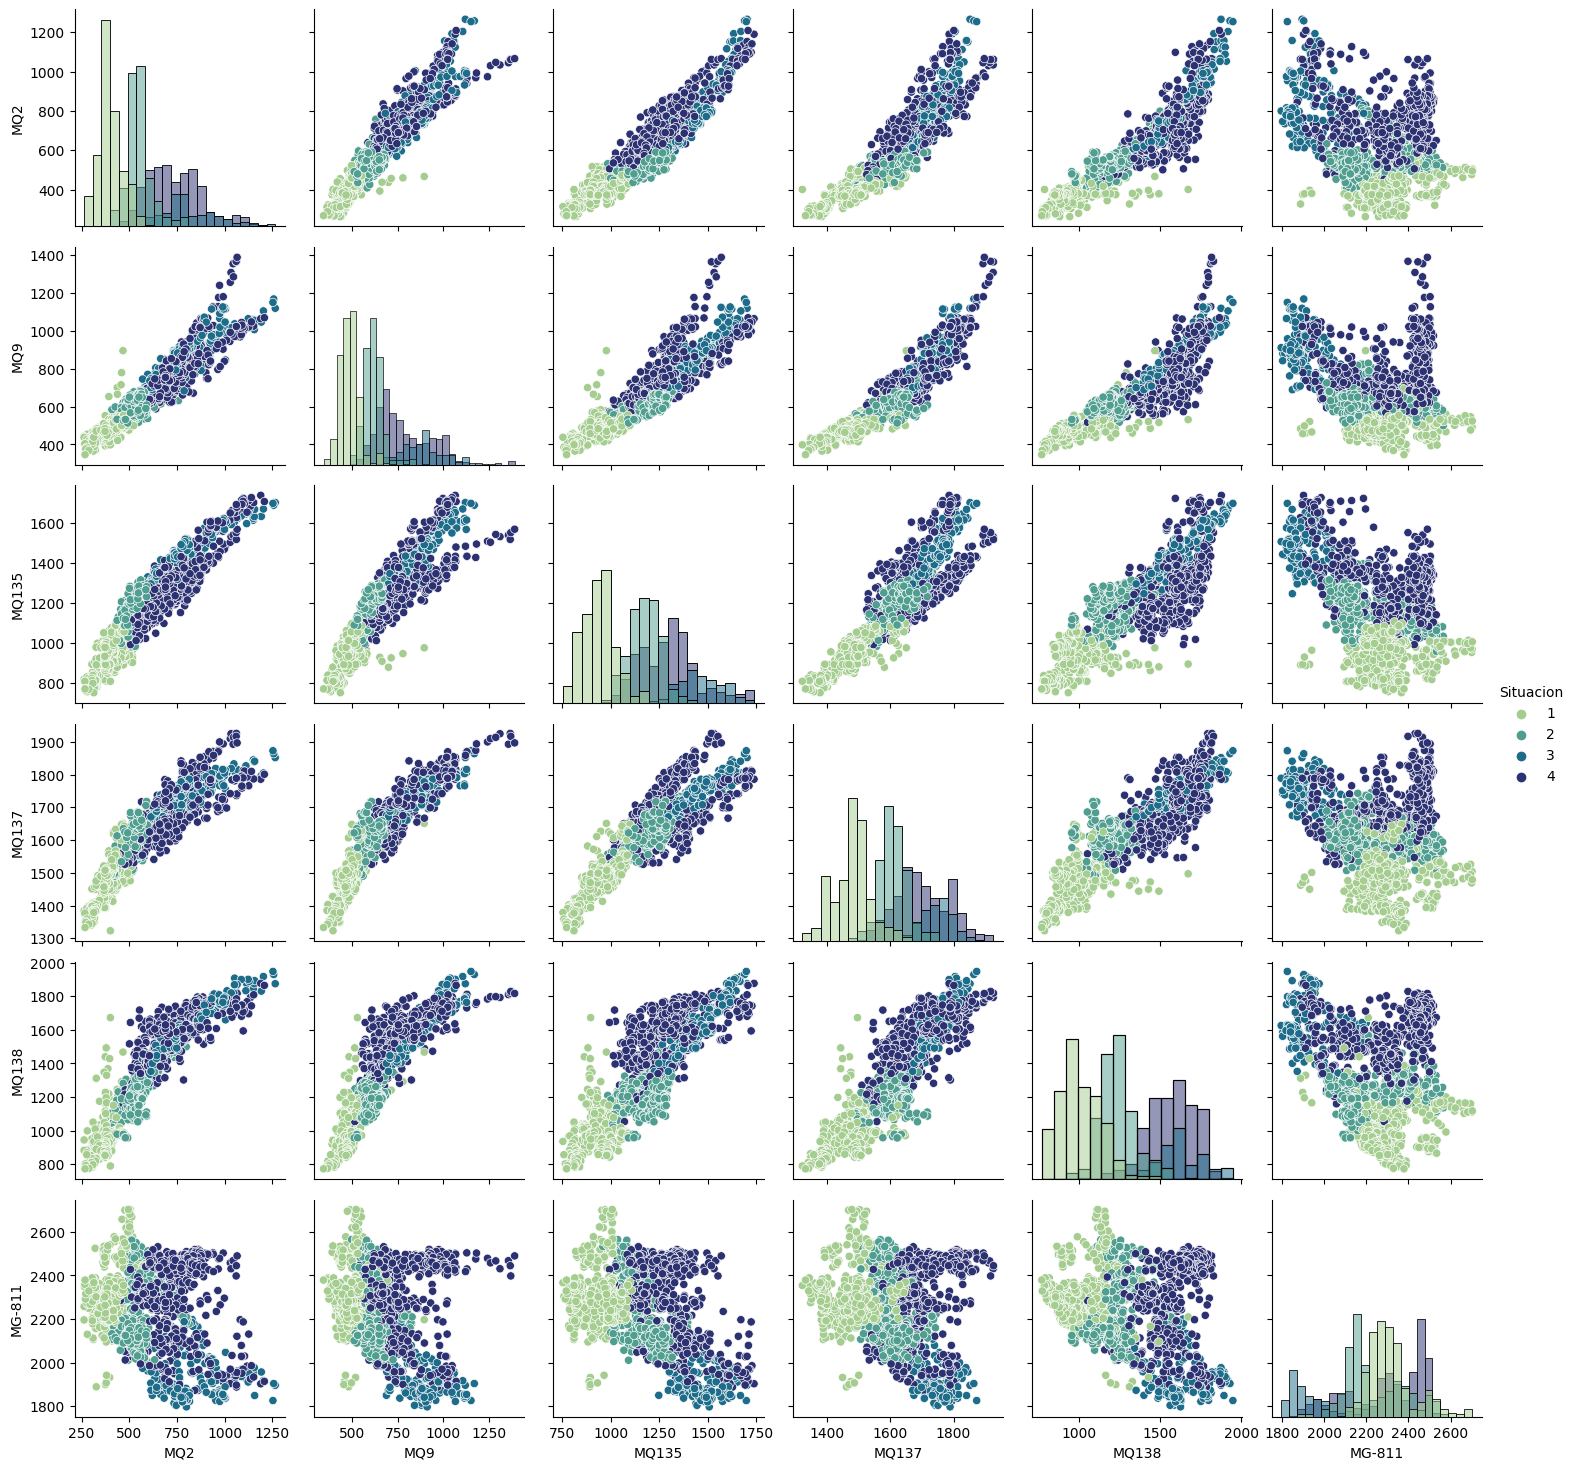

In [ ]:
g = sns.PairGrid(dataset, hue="Situacion", palette='crest')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Preprocesamiento

In [ ]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['Situacion']
X = dataset.drop('Situacion', axis=1)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=8)

## LazyPredict

In [ ]:
clf_lazy = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=8)
models, predictions = clf_lazy.fit(X_train, X_test, y_train, y_test)
models

 90%|████████▉ | 26/29 [00:03<00:00, 10.81it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1281, number of used features: 6
[LightGBM] [Info] Start training from score -1.184134
[LightGBM] [Info] Start training from score -1.274863
[LightGBM] [Info] Start training from score -2.272594
[LightGBM] [Info] Start training from score -1.166435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

100%|██████████| 29/29 [00:03<00:00,  7.78it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.97,0.98,None,0.97,0.22
LabelSpreading,0.97,0.98,None,0.97,0.32
KNeighborsClassifier,0.97,0.97,None,0.97,0.07
ExtraTreesClassifier,0.97,0.97,None,0.97,0.30
LGBMClassifier,0.95,0.95,None,0.95,0.65
BaggingClassifier,0.95,0.94,None,0.95,0.10
RandomForestClassifier,0.95,0.94,None,0.95,0.49
QuadraticDiscriminantAnalysis,0.92,0.93,None,0.92,0.02
SVC,0.93,0.92,None,0.93,0.10


In [ ]:
# De los modelos que obtuvieron el mejor rendimiento, evaluo: KNeighborsClassifier, RandomForestClassifier, SVC. Complemento con XGB (fuera de sklearn)

# Modelo KNeighbors
KNeighborsClassifier_lazy  = clf_lazy.models.get("KNeighborsClassifier")
# Modelo Random Forest
RandomForestClassifier_lazy = clf_lazy.models.get("RandomForestClassifier")
# Modelo SVM
SVC_lazy = clf_lazy.models.get("SVC")

## Armado del Modelo

### Funciones comunes

In [ ]:
# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','MCC score','Time to Train','Time to Predict','Total Time'])

In [ ]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    accuracy = accuracy_score(y_test, y_predic)
    recall = recall_score(y_test, y_predic, average='weighted')
    precision = precision_score(y_test, y_predic, average='weighted')
    f1s = f1_score(y_test, y_predic, average='weighted')
    MCC = matthews_corrcoef(y_test, y_predic)

    print("#######################################")
    print("Accuracy: "+ "{:.2%}".format(accuracy))
    print("Recall: "+ "{:.2%}".format(recall))
    print("Precision: "+ "{:.2%}".format(precision))
    print("F1-Score: "+ "{:.2%}".format(f1s))
    print("MCC: "+ "{:.2%}".format(MCC))

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [accuracy, recall, precision, f1s, MCC, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

### Random Forest

In [ ]:
start = time.time()

# Entrenamiento
RF_clf = RandomForestClassifier(random_state=8)
RF_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_rf = RF_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_rf))
muestra_metricas("RandomForestClassifier", y_test, pred_rf, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       196
           2       0.94      0.94      0.94       155
           3       0.93      0.91      0.92        58
           4       0.91      0.95      0.93       141

    accuracy                           0.95       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.95      0.95      0.95       550

#######################################
Accuracy: 94.73%
Recall: 94.73%
Precision: 94.81%
F1-Score: 94.75%
MCC: 92.67%
Tiempo de entrenamiento: 0.4667 s
Tiempo de predicción: 0.0121 s
Tiempo total: 0.4788 s
#######################################


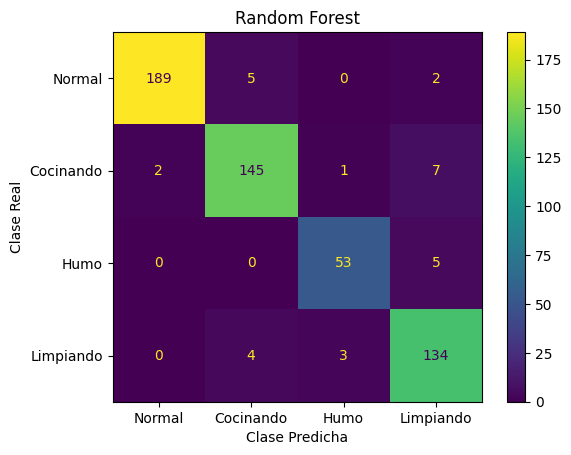

In [ ]:
plot_confusion_matrix(y_test, pred_rf, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Random Forest")

### K Vecinos Cercanos

In [ ]:
start = time.time()

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
muestra_metricas("KNeighborsClassifier", y_test, pred_knn, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       196
           2       0.96      0.97      0.96       155
           3       0.93      0.98      0.96        58
           4       0.98      0.94      0.96       141

    accuracy                           0.97       550
   macro avg       0.96      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550

#######################################
Accuracy: 96.91%
Recall: 96.91%
Precision: 96.94%
F1-Score: 96.91%
MCC: 95.70%
Tiempo de entrenamiento: 0.0080 s
Tiempo de predicción: 0.0344 s
Tiempo total: 0.0423 s
#######################################


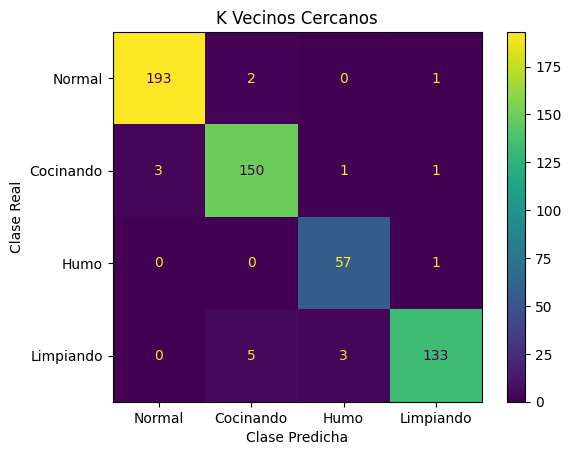

In [ ]:
plot_confusion_matrix(y_test, pred_knn, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="K Vecinos Cercanos")

### eXtreme Gradient Boosting (XGB)

In [ ]:
# Transformo los datos para que las clases posibles sean [0 1 2 3]
le = LabelEncoder()
y_train_transformed = le.fit_transform(y_train)

# El la salida para test también debería de transformarse, sino se comprara cosas distintas
y_test_transformed = le.transform(y_test)

In [ ]:
start = time.time()

# Entrenamiento
xgbc_clf = XGBClassifier(random_state=8)
xgbc_clf.fit(X_train, y_train_transformed)
end_train = time.time()

# Predicciones
pred_xgbc = xgbc_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test_transformed, pred_xgbc))
muestra_metricas("XGBClassifier", y_test_transformed, pred_xgbc, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       196
           1       0.93      0.96      0.94       155
           2       0.92      0.97      0.94        58
           3       0.97      0.93      0.95       141

    accuracy                           0.96       550
   macro avg       0.95      0.96      0.95       550
weighted avg       0.96      0.96      0.96       550

#######################################
Accuracy: 95.64%
Recall: 95.64%
Precision: 95.72%
F1-Score: 95.65%
MCC: 93.94%
Tiempo de entrenamiento: 3.3126 s
Tiempo de predicción: 0.0067 s
Tiempo total: 3.3194 s
#######################################


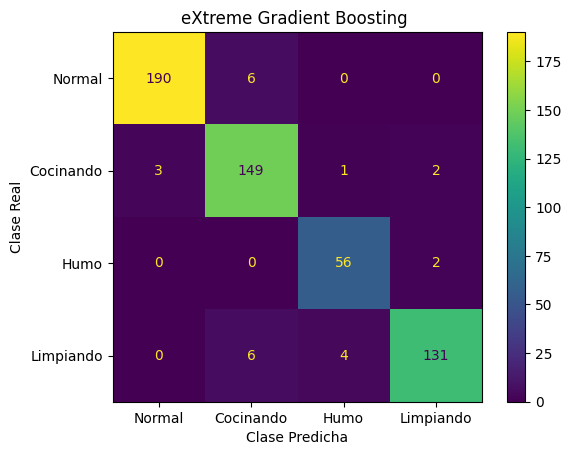

In [ ]:
plot_confusion_matrix(y_test_transformed, pred_xgbc, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="eXtreme Gradient Boosting ")

### Support Vector Machines (SVMs)

In [ ]:
start = time.time()

# Entrenamiento
svm_clf = SVC(random_state=8)
svm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_svm = svm_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm))
muestra_metricas("SVM", y_test, pred_svm, start, end_train, end_predict)

Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.94      0.95       196
           2       0.86      0.85      0.85       155
           3       0.83      0.86      0.85        58
           4       0.83      0.86      0.85       141

    accuracy                           0.88       550
   macro avg       0.87      0.88      0.87       550
weighted avg       0.88      0.88      0.88       550

#######################################
Accuracy: 88.36%
Recall: 88.36%
Precision: 88.44%
F1-Score: 88.39%
MCC: 83.80%
Tiempo de entrenamiento: 0.0332 s
Tiempo de predicción: 0.0259 s
Tiempo total: 0.0590 s
#######################################


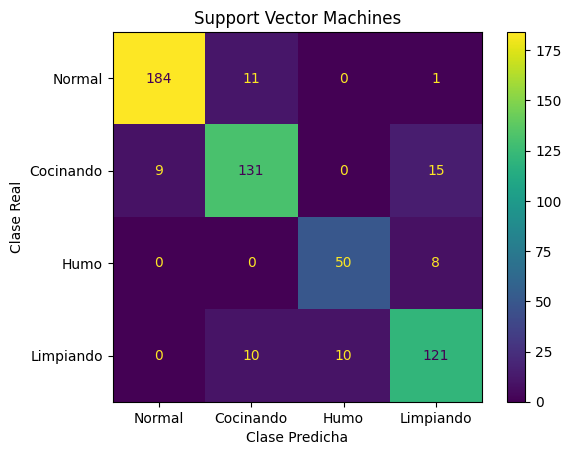

In [ ]:
plot_confusion_matrix(y_test, pred_svm, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="Support Vector Machines")

## **Importancia de las características para el modelo**
***SHAP (SHapley Additive exPlanations)***

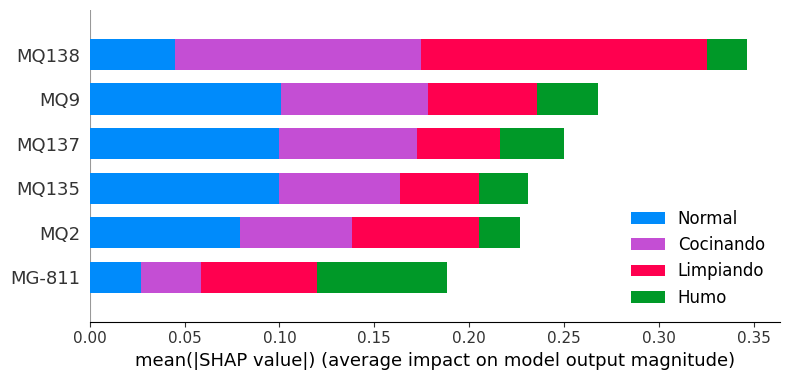

In [ ]:
# Para modelos basados en Árboles
explainer = shap.TreeExplainer(RF_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])

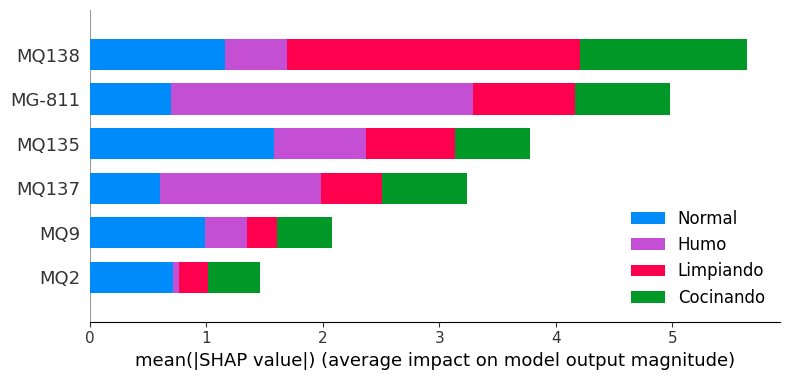

In [ ]:
explainer = shap.TreeExplainer(xgbc_clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=["Normal", "Cocinando", "Humo", "Limpiando"])

## Desempeño sin las características poco importantes identificadas

Se pueden sacar los sensores: MQ2 (poco importante en ambos modelos basados en árboles) y MQ137 (poco importante).


### Funciones comunes

In [ ]:
def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)

labels=["Normal", "Cocinando", "Humo", "Limpiando"]

In [ ]:
dataset_opt = dataset.copy()

In [ ]:
dataset_opt.drop(['MQ2', 'MQ137'], axis=1, inplace=True)

In [ ]:
dataset_opt

,MQ9,MQ135,MQ138,MG-811,Situacion
0,696,1252,1321,2431,4
1,674,1156,1410,2433,4
2,646,1159,1455,2361,4
3,590,1105,1459,2427,4
4,627,1192,1466,2447,4
...,...,...,...,...,...
1840,826,1564,1540,2037,4
1841,821,1571,1543,2008,4
1842,832,1582,1545,1989,4
1843,840,1587,1538,1986,4


In [ ]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset_opt.pop('Situacion')
X = dataset_opt

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=8)

### KNN, 4 características

In [ ]:
start_opt = time.time()

# Entrenamiento
knn_clf_opt = KNeighborsClassifier()
knn_clf_opt.fit(X_train, y_train)
end_train_opt = time.time()

# Predicciones
pred_knn_opt = knn_clf_opt.predict(X_test)
end_predict_opt = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn_opt))
muestra_metricas("KNeighborsClassifier (4 características)", y_test, pred_knn_opt, start_opt, end_train_opt, end_predict_opt)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       196
           2       0.94      0.95      0.94       155
           3       0.93      0.93      0.93        58
           4       0.96      0.92      0.94       141

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550

#######################################
Accuracy: 95.27%
Recall: 95.27%
Precision: 95.27%
F1-Score: 95.26%
MCC: 93.41%
Tiempo de entrenamiento: 0.0046 s
Tiempo de predicción: 0.0336 s
Tiempo total: 0.0382 s
#######################################


Traigo a colación el reporte del KNN con todos los predictores:                                              

```
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       196
           2       0.96      0.97      0.96       155
           3       0.93      0.98      0.96        58
           4       0.98      0.94      0.96       141

    accuracy                           0.97       550
   macro avg       0.96      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550
```
Comparo matrices de confusión:

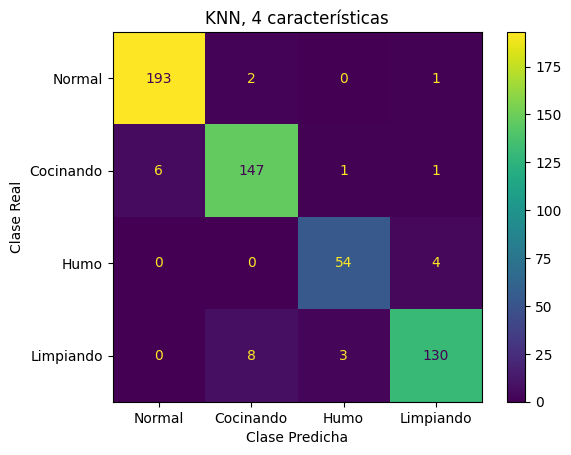

In [ ]:
plot_confusion_matrix(y_test, pred_knn_opt, labels=labels, model_name="KNN, 4 características")

### Random Forest, 4 características

In [ ]:
start_opt = time.time()
# Entrenamiento
RF_clf_opt = RandomForestClassifier(random_state=8)
RF_clf_opt.fit(X_train, y_train)
end_train_opt = time.time()

# Predicciones
pred_rf_opt = RF_clf_opt.predict(X_test)
end_predict_opt = time.time()

print("Reporte de Clasificación: \n", classification_report(y_test, pred_rf_opt))
muestra_metricas("RandomForestClassifier  (4 características)", y_test, pred_rf_opt, start_opt, end_train_opt, end_predict_opt)

Reporte de Clasificación: 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       196
           2       0.94      0.94      0.94       155
           3       0.95      0.91      0.93        58
           4       0.90      0.94      0.92       141

    accuracy                           0.95       550
   macro avg       0.95      0.94      0.94       550
weighted avg       0.95      0.95      0.95       550

#######################################
Accuracy: 95.09%
Recall: 95.09%
Precision: 95.17%
F1-Score: 95.11%
MCC: 93.16%
Tiempo de entrenamiento: 0.3355 s
Tiempo de predicción: 0.0122 s
Tiempo total: 0.3477 s
#######################################


Traigo a colación el reporte del RF con todos los predictores:                                              

```
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.96      0.98       196
           2       0.94      0.94      0.94       155
           3       0.93      0.91      0.92        58
           4       0.91      0.95      0.93       141

    accuracy                           0.95       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.95      0.95      0.95       550
```

Comparo matrices de confusión:





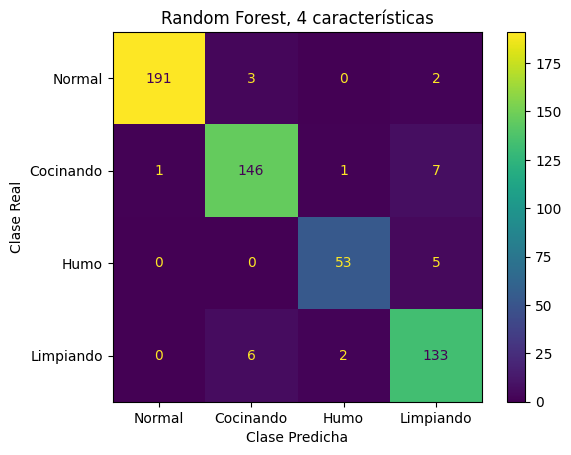

In [ ]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_rf_opt, labels=labels, model_name="Random Forest, 4 características")

In [ ]:
# Importancia de las features
df_importances = pd.DataFrame({
    'Variables': dataset_opt.columns,
    'Importancia DTC': RF_clf_opt.feature_importances_,
})

df_importances.sort_values(by='Importancia DTC', ascending=False)

,Variables,Importancia DTC
0,MQ9,0.30
2,MQ138,0.28
1,MQ135,0.25
3,MG-811,0.17


### eXtreme Gradient Boosting (XGB), 4 características

In [ ]:
# Transformo los datos para que las clases posibles sean [0 1 2 3]
y_train_transformed = le.transform(y_train)

# El la salida para test también debería de transformarse, sino se comprara cosas distintas
y_test_transformed = le.transform(y_test)

In [ ]:
start_opt = time.time()
# Entrenamiento
xgbc_clf_opt = XGBClassifier(random_state=8)
xgbc_clf_opt.fit(X_train, y_train_transformed)
end_train = time.time()
end_train_opt = time.time()

# Predicciones
pred_xgbc_opt = xgbc_clf_opt.predict(X_test)
end_predict = time.time()
end_predict_opt = time.time()

print("Classification Report: \n", classification_report(y_test_transformed, pred_xgbc_opt))
muestra_metricas("XGBClassifier  (4 características)", y_test_transformed, pred_xgbc_opt, start_opt, end_train_opt, end_predict_opt)

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       196
           1       0.92      0.92      0.92       155
           2       0.96      0.90      0.93        58
           3       0.90      0.93      0.92       141

    accuracy                           0.94       550
   macro avg       0.94      0.93      0.94       550
weighted avg       0.94      0.94      0.94       550

#######################################
Accuracy: 94.00%
Recall: 94.00%
Precision: 94.05%
F1-Score: 94.01%
MCC: 91.62%
Tiempo de entrenamiento: 0.2063 s
Tiempo de predicción: 0.0071 s
Tiempo total: 0.2134 s
#######################################


Traigo a colación el reporte del XGB con todos los predictores:                                              

```
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       196
           1       0.93      0.96      0.94       155
           2       0.92      0.97      0.94        58
           3       0.97      0.93      0.95       141

    accuracy                           0.96       550
   macro avg       0.95      0.96      0.95       550
weighted avg       0.96      0.96      0.96       550
```
Comparo matrices de confusión:

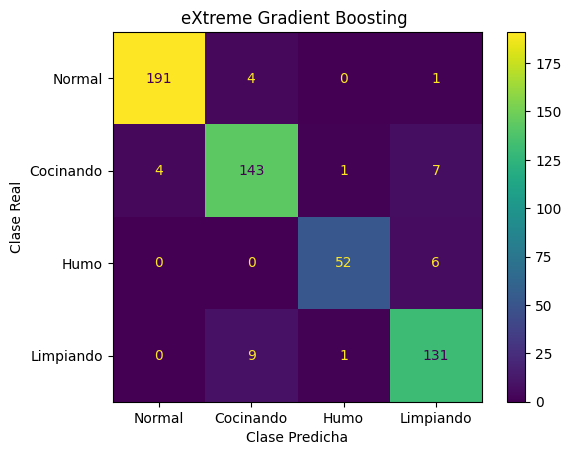

In [ ]:
plot_confusion_matrix(y_test_transformed, pred_xgbc_opt, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="eXtreme Gradient Boosting ")

### SVM, 4 características

In [ ]:
start_opt = time.time()
# Entrenamiento
svm_clf_opt = SVC(random_state=8)
svm_clf_opt.fit(X_train, y_train)
end_train_opt = time.time()

# Predicciones
pred_svm_opt = svm_clf_opt.predict(X_test)
end_predict_opt = time.time()

print("Classification Report: \n", classification_report(y_test, pred_svm_opt))
muestra_metricas("SVM  (4 características)", y_test, pred_svm_opt, start_opt, end_train_opt, end_predict_opt)

Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.94      0.95       196
           2       0.88      0.85      0.86       155
           3       0.81      0.83      0.82        58
           4       0.81      0.85      0.83       141

    accuracy                           0.88       550
   macro avg       0.86      0.87      0.87       550
weighted avg       0.88      0.88      0.88       550

#######################################
Accuracy: 88.00%
Recall: 88.00%
Precision: 88.13%
F1-Score: 88.04%
MCC: 83.30%
Tiempo de entrenamiento: 0.0317 s
Tiempo de predicción: 0.0194 s
Tiempo total: 0.0511 s
#######################################


Traigo a colación el reporte del SVM con todos los predictores:                                              

```
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.94      0.95       196
           2       0.86      0.85      0.85       155
           3       0.83      0.86      0.85        58
           4       0.83      0.86      0.85       141

    accuracy                           0.88       550
   macro avg       0.87      0.88      0.87       550
weighted avg       0.88      0.88      0.88       550
```
Comparo matrices de confusión:

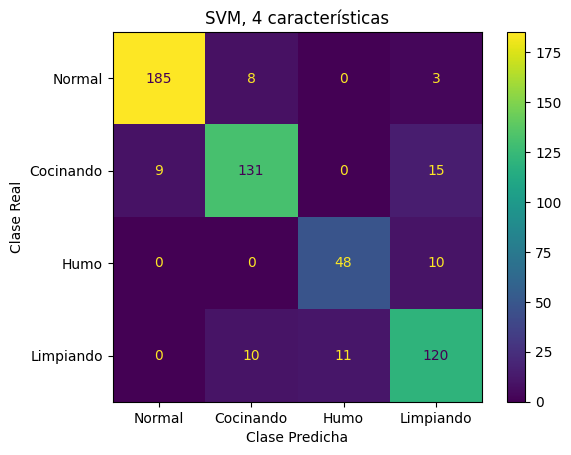

In [ ]:
plot_confusion_matrix(y_test, pred_svm_opt, labels=["Normal", "Cocinando", "Humo", "Limpiando"], model_name="SVM, 4 características")

### Comparación de modelos con 4 características

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'Time to Train':'{:.3f}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train,Time to Predict,Total Time
KNeighborsClassifier,96.91%,96.91%,96.94%,96.91%,95.70%,0.008,0.034,0.042
XGBClassifier,95.64%,95.64%,95.72%,95.65%,93.94%,3.313,0.007,3.319
KNeighborsClassifier (4 características),95.27%,95.27%,95.27%,95.26%,93.41%,0.005,0.034,0.038
RandomForestClassifier (4 características),95.09%,95.09%,95.17%,95.11%,93.16%,0.335,0.012,0.348
RandomForestClassifier,94.73%,94.73%,94.81%,94.75%,92.67%,0.467,0.012,0.479
XGBClassifier (4 características),94.00%,94.00%,94.05%,94.01%,91.62%,0.206,0.007,0.213
SVM,88.36%,88.36%,88.44%,88.39%,83.80%,0.033,0.026,0.059
SVM (4 características),88.00%,88.00%,88.13%,88.04%,83.30%,0.032,0.019,0.051
